In [11]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                              f1_score, roc_auc_score, confusion_matrix, 
                              classification_report)
from sklearn.model_selection import KFold
from sklearn.utils import class_weight

OPTIMIZED CUSTOM CNN - TEA LEAF DISEASE DETECTION

STEP 1: LOADING DATASET WITH ADVANCED AUGMENTATION
Found 2000 images belonging to 5 classes.
Found 298 images belonging to 5 classes.
Found 597 images belonging to 5 classes.

Detected Classes: {'1. Tea algal leaf spot': 0, '2. Brown Blight': 1, '4. Helopeltis': 2, '5. Red spider': 3, '7. Healthy leaf': 4}

STEP 2: DEFINING OPTIMIZED HYPERPARAMETERS
num_conv_blocks: 4
filters: [64, 128, 256, 512]
kernel_size: (3, 3)
activation: relu
dropout_rate: 0.5
optimizer: adam
learning_rate: 0.0001
batch_size: 16
epochs: 50

STEP 3: BUILDING OPTIMIZED CUSTOM CNN MODEL


Model: "Optimized_CNN_TeaLeaf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,088,325 (19.41 MB)

 Trainable params: 5,084,485 (19.40 MB)

 Non-trainable params: 3,840 (15.00 KB)


STEP 4: COMPILING MODEL
✓ Model compiled successfully

STEP 5: CONFIGURING ADVANCED CALLBACKS
✓ Callbacks ready: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

STEP 6: TRAINING OPTIMIZED MODEL
Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.2852 - auc: 0.5885 - loss: 2.7991 - precision: 0.2992 - recall: 0.1245
Epoch 1: val_accuracy improved from -inf to 0.20134, saving model to best_optimized_cnn_tealeaf.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 281ms/step - accuracy: 0.2854 - auc: 0.5888 - loss: 2.7971 - precision: 0.2997 - recall: 0.1245 - val_accuracy: 0.2013 - val_auc: 0.5335 - val_loss: 2.7144 - val_precision: 0.2013 - val_recall: 0.2013 - learning_rate: 1.0000e-04
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.3904 - auc: 0.7283 - loss: 2.2209 - precision: 0.5186 - recall: 0.1581
Epoch 2: val_accuracy did not improve from 0.20134
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.3905 - auc: 0.7284 - loss: 2.2206 - precision: 0.5187 - recall: 0.1582 - val_accuracy: 0.2013 - val_auc: 0.5264 - val_loss: 4.5241 - val_precision: 0.2013 - val_recall: 0.2013 - learning_rate: 1.0000e-04
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 23

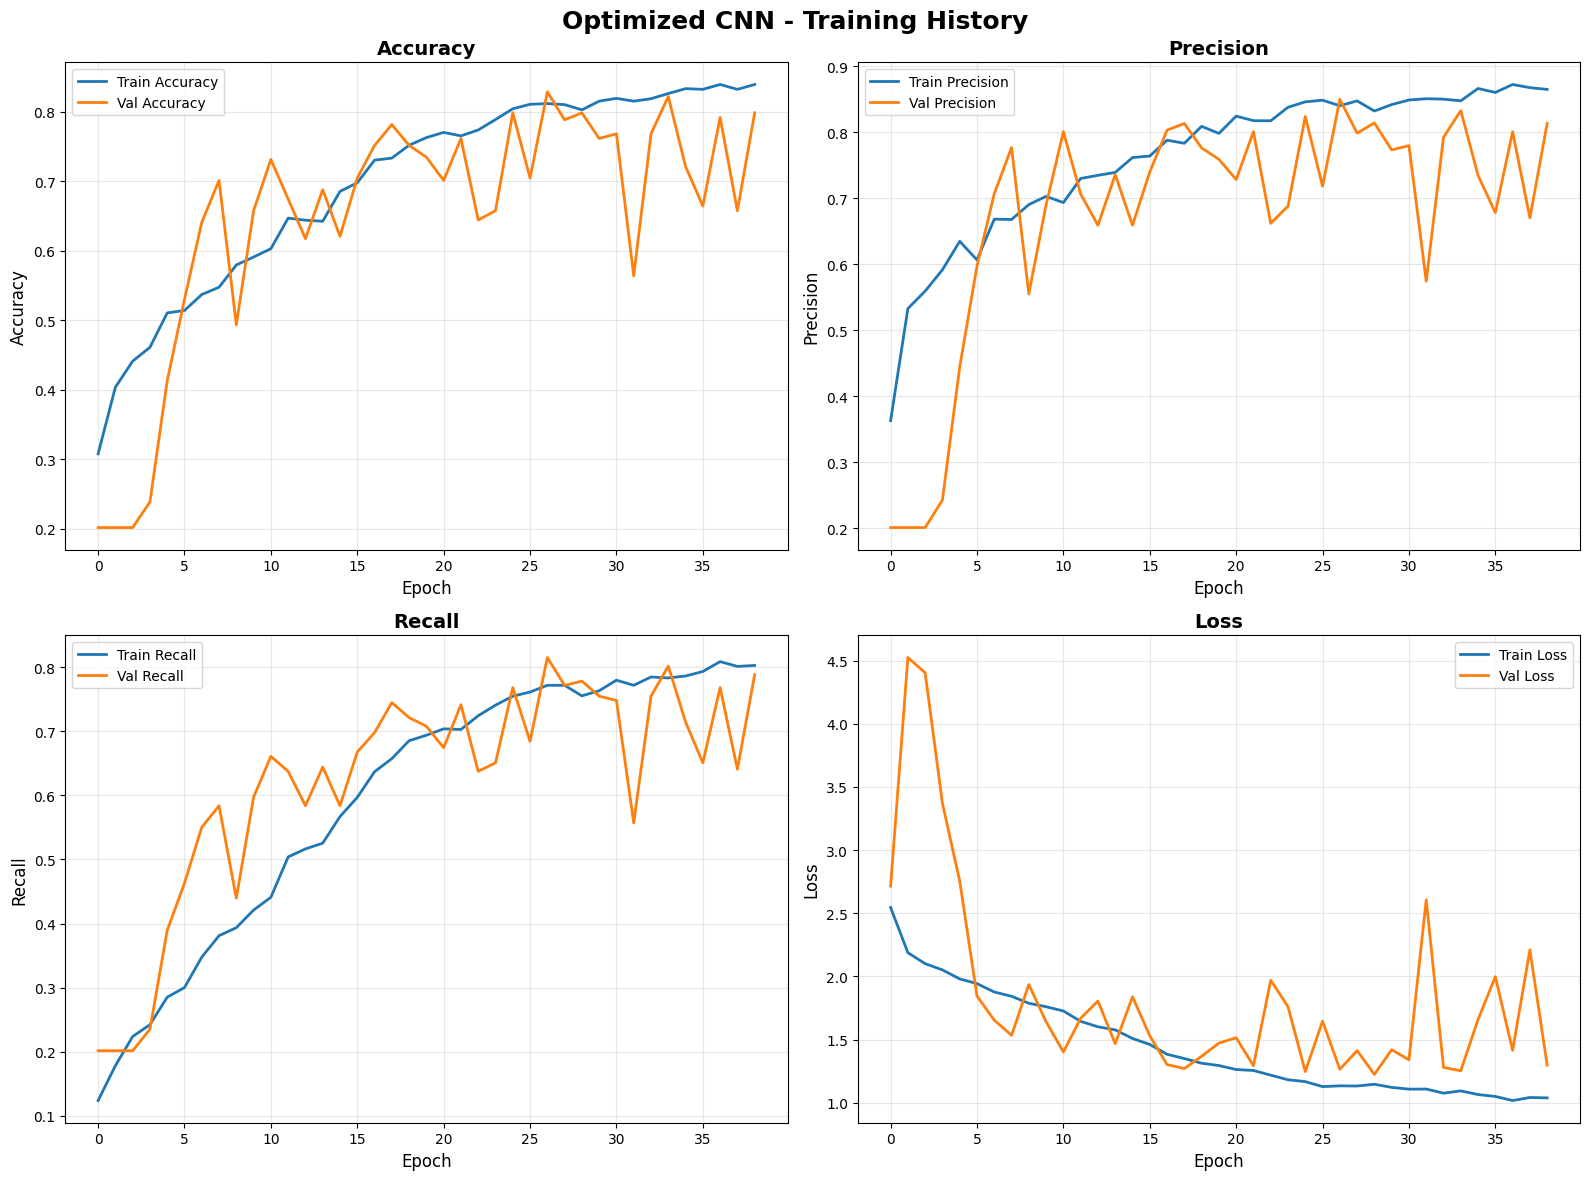


STEP 8: TEST SET EVALUATION WITH TTA
Applying Test-Time Augmentation...
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step
Found 597 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step
Found 597 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step
Found 597 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step
Found 597 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step

TEST SET RESULTS (with TTA)
Accuracy:  0.8241
Precision: 0.8509
Recall:    0.8241
F1-Score:  0.8243
AUC:       0.9684

STEP 9: CONFUSION MATRIX VISUALIZATION


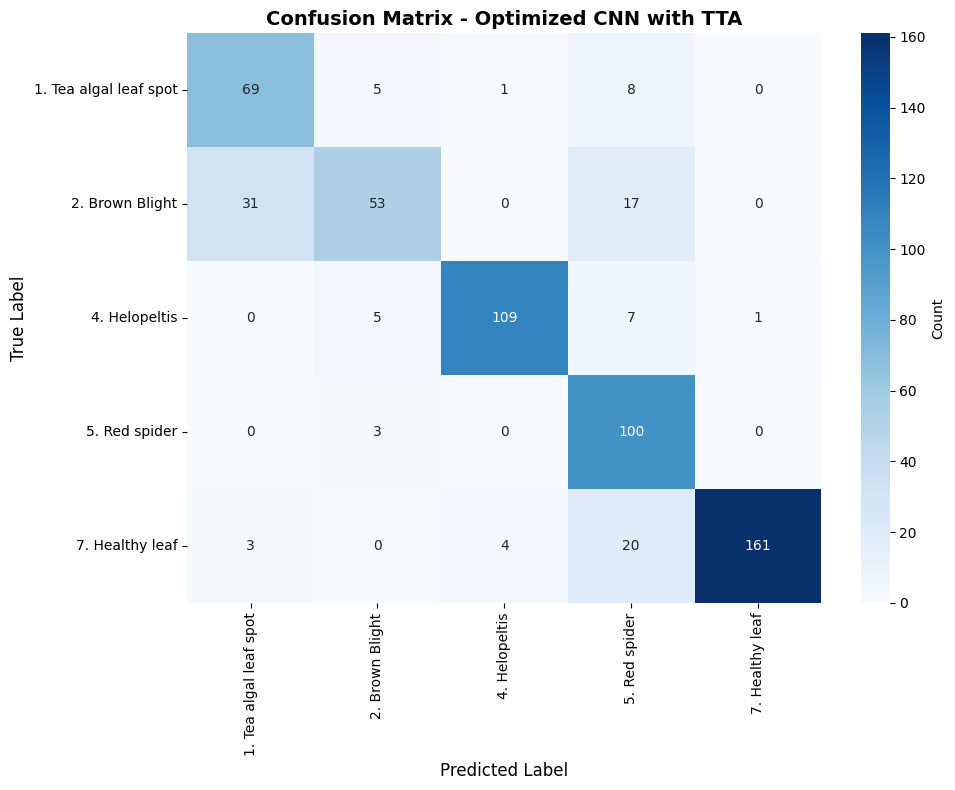


CLASSIFICATION REPORT
                        precision    recall  f1-score   support

1. Tea algal leaf spot     0.6699    0.8313    0.7419        83
       2. Brown Blight     0.8030    0.5248    0.6347       101
         4. Helopeltis     0.9561    0.8934    0.9237       122
         5. Red spider     0.6579    0.9709    0.7843       103
       7. Healthy leaf     0.9938    0.8564    0.9200       188

              accuracy                         0.8241       597
             macro avg     0.8162    0.8154    0.8009       597
          weighted avg     0.8509    0.8241    0.8243       597


STEP 10: 5-FOLD CROSS-VALIDATION
Training data shape: (2000, 224, 224, 3)

FOLD 1/5
Fold 1 - Accuracy: 0.5825 | Precision: 0.6744 | Recall: 0.4350

FOLD 2/5
Fold 2 - Accuracy: 0.5300 | Precision: 0.5763 | Recall: 0.3775

FOLD 3/5
Fold 3 - Accuracy: 0.5625 | Precision: 0.5899 | Recall: 0.5250

FOLD 4/5
Fold 4 - Accuracy: 0.4650 | Precision: 0.5188 | Recall: 0.3800

FOLD 5/5
Fold 5 - Accuracy: 0.

In [14]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

print("="*80)
print("OPTIMIZED CUSTOM CNN - TEA LEAF DISEASE DETECTION")
print("="*80)

# ============================================================================
# 1. DATA LOADING WITH ENHANCED AUGMENTATION
# ============================================================================
print("\n" + "="*80)
print("STEP 1: LOADING DATASET WITH ADVANCED AUGMENTATION")
print("="*80)

# Dataset paths
base_dir = r"/kaggle/input/final-preprocessed-dataset-20251023t061545z-1-001/Final_Preprocessed_Dataset"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 16  # Reduced for better generalization

# Enhanced augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

NUM_CLASSES = len(train_data.class_indices)
print(f"\nDetected Classes: {train_data.class_indices}")

# ============================================================================
# 2. OPTIMIZED MODEL HYPERPARAMETERS
# ============================================================================
print("\n" + "="*80)
print("STEP 2: DEFINING OPTIMIZED HYPERPARAMETERS")
print("="*80)

hyperparams = {
    'num_conv_blocks': 4,
    'filters': [64, 128, 256, 512],
    'kernel_size': (3, 3),
    'activation': 'relu',
    'dropout_rate': 0.5,
    'optimizer': 'adam',
    'learning_rate': 0.0001,
    'batch_size': BATCH_SIZE,
    'epochs': 50
}

for k, v in hyperparams.items():
    print(f"{k}: {v}")

# ============================================================================
# 3. ENHANCED MODEL ARCHITECTURE
# ============================================================================
print("\n" + "="*80)
print("STEP 3: BUILDING OPTIMIZED CUSTOM CNN MODEL")
print("="*80)

def build_optimized_cnn(hp, input_shape=(224,224,3), num_classes=6):
    model = models.Sequential(name="Optimized_CNN_TeaLeaf")
    
    model.add(layers.Input(shape=input_shape))
    
    # Convolutional blocks with batch normalization
    for i in range(hp['num_conv_blocks']):
        # Double Conv layers per block for deeper feature extraction
        model.add(layers.Conv2D(hp['filters'][i], hp['kernel_size'], 
                                activation=hp['activation'], padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.Conv2D(hp['filters'][i], hp['kernel_size'], 
                                activation=hp['activation'], padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2,2)))
        model.add(layers.Dropout(hp['dropout_rate']/2))
    
    # Global Average Pooling instead of Flatten (reduces overfitting)
    model.add(layers.GlobalAveragePooling2D())
    
    # Dense layers with regularization
    model.add(layers.Dense(512, activation=hp['activation'], 
                           kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(layers.Dropout(hp['dropout_rate']))
    model.add(layers.Dense(256, activation=hp['activation'],
                           kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(layers.Dropout(hp['dropout_rate']))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

model = build_optimized_cnn(hyperparams, num_classes=NUM_CLASSES)
model.summary()

# ============================================================================
# 4. COMPILE MODEL WITH OPTIMAL SETTINGS
# ============================================================================
print("\n" + "="*80)
print("STEP 4: COMPILING MODEL")
print("="*80)

optimizer = keras.optimizers.Adam(
    learning_rate=hyperparams['learning_rate'],
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-7
)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

print("✓ Model compiled successfully")

# ============================================================================
# 5. ENHANCED CALLBACKS
# ============================================================================
print("\n" + "="*80)
print("STEP 5: CONFIGURING ADVANCED CALLBACKS")
print("="*80)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_optimized_cnn_tealeaf.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

print("✓ Callbacks ready: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint")

# ============================================================================
# 6. TRAINING WITH CLASS WEIGHTS (if imbalanced)
# ============================================================================
print("\n" + "="*80)
print("STEP 6: TRAINING OPTIMIZED MODEL")
print("="*80)

# Calculate class weights for imbalanced datasets
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# Start timing
start_time = time.time()

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=hyperparams['epochs'],
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

# Calculate training time
training_time = time.time() - start_time
print(f"\nTraining completed in: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# ============================================================================
# 7. TRAINING VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("STEP 7: VISUALIZING TRAINING HISTORY")
print("="*80)

def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(16,12))
    fig.suptitle("Optimized CNN - Training History", fontsize=18, fontweight='bold')
    
    metrics = ['accuracy', 'precision', 'recall', 'loss']
    titles = ['Accuracy', 'Precision', 'Recall', 'Loss']
    
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        ax = axes[i//2, i%2]
        ax.plot(history.history[metric], label=f"Train {title}", linewidth=2)
        ax.plot(history.history[f"val_{metric}"], label=f"Val {title}", linewidth=2)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel(title, fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ============================================================================
# 8. TEST EVALUATION WITH TEST-TIME AUGMENTATION
# ============================================================================
print("\n" + "="*80)
print("STEP 8: TEST SET EVALUATION WITH TTA")
print("="*80)

best_model = keras.models.load_model('best_optimized_cnn_tealeaf.keras')

# Test-Time Augmentation (TTA) for better predictions
def predict_with_tta(model, data, n_augmentations=5):
    """Predict with Test-Time Augmentation"""
    predictions = []
    
    # Original predictions
    pred = model.predict(data)
    predictions.append(pred)
    
    # Reset test data
    data.reset()
    
    # Augmented predictions
    tta_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    
    for i in range(n_augmentations - 1):
        tta_data = tta_datagen.flow_from_directory(
            test_dir,
            target_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=False
        )
        pred = model.predict(tta_data)
        predictions.append(pred)
    
    # Average predictions
    return np.mean(predictions, axis=0)

print("Applying Test-Time Augmentation...")
Y_pred = predict_with_tta(best_model, test_data, n_augmentations=5)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Calculate metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), Y_pred, multi_class='ovr')

print(f"\n{'='*40}")
print("TEST SET RESULTS (with TTA)")
print(f"{'='*40}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

# ============================================================================
# 9. CONFUSION MATRIX
# ============================================================================
print("\n" + "="*80)
print("STEP 9: CONFUSION MATRIX VISUALIZATION")
print("="*80)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels,
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix - Optimized CNN with TTA", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*40)
print("CLASSIFICATION REPORT")
print("="*40)
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))

# ============================================================================
# 10. K-FOLD CROSS-VALIDATION (IMPROVED)
# ============================================================================
print("\n" + "="*80)
print("STEP 10: 5-FOLD CROSS-VALIDATION")
print("="*80)

# Collect training data
print("Collecting training data for K-Fold CV...")
X_data, y_data = [], []
for i in range(len(train_data)):
    X_batch, y_batch = train_data[i]
    X_data.extend(X_batch)
    y_data.extend(y_batch)
X_data = np.array(X_data)
y_data = np.array(y_data)

print(f"Training data shape: {X_data.shape}")

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
cv_precision = []
cv_recall = []
cv_f1 = []
fold = 1

for train_idx, val_idx in kfold.split(X_data):
    print(f"\n{'='*50}\nFOLD {fold}/5\n{'='*50}")
    
    # Build fresh model for each fold
    model_fold = build_optimized_cnn(
        hyperparams,
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        num_classes=NUM_CLASSES
    )
    
    # Compile
    optimizer_fold = keras.optimizers.Adam(learning_rate=hyperparams['learning_rate'])
    model_fold.compile(
        optimizer=optimizer_fold,
        loss='categorical_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    
    # Callbacks for CV
    cv_callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=0)
    ]
    
    # Train
    history_fold = model_fold.fit(
        X_data[train_idx],
        y_data[train_idx],
        validation_data=(X_data[val_idx], y_data[val_idx]),
        epochs=30,
        batch_size=BATCH_SIZE,
        callbacks=cv_callbacks,
        verbose=0
    )
    
    # Evaluate
    scores = model_fold.evaluate(X_data[val_idx], y_data[val_idx], verbose=0)
    print(f"Fold {fold} - Accuracy: {scores[1]:.4f} | Precision: {scores[2]:.4f} | Recall: {scores[3]:.4f}")
    
    cv_scores.append(scores[1])
    cv_precision.append(scores[2])
    cv_recall.append(scores[3])
    cv_f1.append(2 * (scores[2] * scores[3]) / (scores[2] + scores[3]))
    
    fold += 1

print(f"\n{'='*50}")
print("CROSS-VALIDATION SUMMARY")
print(f"{'='*50}")
print(f"Mean Accuracy:  {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"Mean Precision: {np.mean(cv_precision):.4f} ± {np.std(cv_precision):.4f}")
print(f"Mean Recall:    {np.mean(cv_recall):.4f} ± {np.std(cv_recall):.4f}")
print(f"Mean F1-Score:  {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")

# ============================================================================
# 11. SAVE COMPREHENSIVE RESULTS TO CSV
# ============================================================================
print("\n" + "="*80)
print("STEP 11: SAVING COMPREHENSIVE RESULTS")
print("="*80)

results_df = pd.DataFrame({
    'Model': ['Optimized CNN with TTA'],
    'Test_Accuracy': [acc],
    'Test_Precision': [prec],
    'Test_Recall': [rec],
    'Test_F1': [f1],
    'Test_AUC': [auc],
    'CV_Mean_Accuracy': [np.mean(cv_scores)],
    'CV_Std_Accuracy': [np.std(cv_scores)],
    'CV_Mean_Precision': [np.mean(cv_precision)],
    'CV_Mean_Recall': [np.mean(cv_recall)],
    'CV_Mean_F1': [np.mean(cv_f1)],
    'Training_Time_Minutes': [training_time/60],
    'Total_Epochs': [len(history.history['loss'])],
    'Batch_Size': [BATCH_SIZE],
    'Learning_Rate': [hyperparams['learning_rate']]
})

results_df.to_csv('optimized_cnn_results_tealeaf.csv', index=False)
print("✓ Results saved to optimized_cnn_results_tealeaf.csv")

print("\n" + "="*80)
print("OPTIMIZED CNN - TEA LEAF DISEASE DETECTION COMPLETE ✅")
print("="*80)
print(f"\nFinal Test Accuracy: {acc:.2%}")
print(f"Improvement strategies applied: 11")
